In [ ]:
import subprocess

import pandas as pd

from kcmc_instance import KCMC_Instance

from gurobi_models import gurobi_multi_flow, get_installation


from tqdm.notebook import tqdm


list_serialized_instances = pd.read_csv('/data/instances.csv', header=None)[0].tolist()[100:350]

K = 2
M = 1

In [2]:
gurobi_mf_data = []
for ser_instance in tqdm(list_serialized_instances):
    try:
        obj_instance = KCMC_Instance(ser_instance, False, True, True)
    except: continue
        
    model, X, Y = gurobi_multi_flow(K, M, obj_instance, 60, 4)
    results = model.optimize()
    
    gurobi_mf_data.append({
        'instance': obj_instance, 'serialized_instance': ser_instance,
        'gurobi_mf_status': results['status'],
        'gurobi_mf_feasible': results['status'] == 'OPTIMAL',
        'gurobi_mf_runtime': results['gurobi_runtime']
    })
    
    #print('\n\n', obj_instance)
    #print(results['status'], results['gurobi_runtime'])
    if results['status'] in {'OPTIMAL'}:
        wsn, installation = get_installation(X)
        #print(len(wsn), len(installation), round(len(installation)/len(wsn), 3))        
        gurobi_mf_data[-1].update({'gurobi_mf_installation': installation,
                                   'gurobi_mf_size': len(installation),
                                   'gurobi_mf_quality': len(installation)/len(wsn)})
        
gurobi_mf_data = pd.DataFrame(gurobi_mf_data)

  0%|          | 0/200 [00:00<?, ?it/s]

[client] info  : Using libcurl/7.76.1 OpenSSL/1.1.1k
[client] info  : Default certificate path is /etc/ssl/certs/ca-certificates.crt
[client] info  : No HTTPS proxy
[client] info  : No HTTP proxy
[client] info  : Validate web license token 3870de3e-f3e3-498f-871d-26f811411d21 for container 7050f2caaece51ef8d4065587a4149cdb5efbb912b3f3b1b552d2ecdea928b45
Academic license - for non-commercial use only - registered to josefrf@ufmg.br
[client] info  : Web license token valid
Using license file /opt/gurobi/gurobi.lic
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID
Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter Threads to 4
   Prev: 0  Min: 0  Max: 1024  Default: 0
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
[client] info  : Validate web license token 3870de3e-f3e3-498f-871d-26f811411d21 for container 7050f2caaece51ef8d4065587a4149cdb5efbb912b3f3b1b552d2ecdea928b45
Aca

Academic license - for non-commercial use only - registered to josefrf@ufmg.br
[client] info  : Web license token valid
Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter Threads to 4
   Prev: 0  Min: 0  Max: 1024  Default: 0
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
[client] info  : Validate web license token 3870de3e-f3e3-498f-871d-26f811411d21 for container 7050f2caaece51ef8d4065587a4149cdb5efbb912b3f3b1b552d2ecdea928b45
Academic license - for non-commercial use only - registered to josefrf@ufmg.br
[client] info  : Web license token valid
Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter Threads to 4
   Prev: 0  Min: 0  Max: 1024  Default: 0
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
[client] info  : Validate web license token 3870de3e-f3e3-498f-871d-26f811411d21 for container 7050f2caaece51e

   Value: 1  Min: 0  Max: 1  Default: 1
[client] info  : Validate web license token 3870de3e-f3e3-498f-871d-26f811411d21 for container 7050f2caaece51ef8d4065587a4149cdb5efbb912b3f3b1b552d2ecdea928b45
Academic license - for non-commercial use only - registered to josefrf@ufmg.br
[client] info  : Web license token valid
Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter Threads to 4
   Prev: 0  Min: 0  Max: 1024  Default: 0
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
[client] info  : Validate web license token 3870de3e-f3e3-498f-871d-26f811411d21 for container 7050f2caaece51ef8d4065587a4149cdb5efbb912b3f3b1b552d2ecdea928b45
Academic license - for non-commercial use only - registered to josefrf@ufmg.br
[client] info  : Web license token valid
Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter Threads to 4
   Prev: 0  Min: 0  Max

Academic license - for non-commercial use only - registered to josefrf@ufmg.br
[client] info  : Web license token valid
Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter Threads to 4
   Prev: 0  Min: 0  Max: 1024  Default: 0
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
[client] info  : Validate web license token e61c756c-f5a4-4001-9bbd-b597ff48c289 for container 7050f2caaece51ef8d4065587a4149cdb5efbb912b3f3b1b552d2ecdea928b45
Academic license - for non-commercial use only - registered to josefrf@ufmg.br
[client] info  : Web license token valid
Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter Threads to 4
   Prev: 0  Min: 0  Max: 1024  Default: 0
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
[client] info  : Validate web license token e61c756c-f5a4-4001-9bbd-b597ff48c289 for container 7050f2caaece51e

   Value: 1  Min: 0  Max: 1  Default: 1
[client] info  : Validate web license token e61c756c-f5a4-4001-9bbd-b597ff48c289 for container 7050f2caaece51ef8d4065587a4149cdb5efbb912b3f3b1b552d2ecdea928b45
Academic license - for non-commercial use only - registered to josefrf@ufmg.br
[client] info  : Web license token valid
Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter Threads to 4
   Prev: 0  Min: 0  Max: 1024  Default: 0
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
[client] info  : Validate web license token e61c756c-f5a4-4001-9bbd-b597ff48c289 for container 7050f2caaece51ef8d4065587a4149cdb5efbb912b3f3b1b552d2ecdea928b45
Academic license - for non-commercial use only - registered to josefrf@ufmg.br
[client] info  : Web license token valid
Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter Threads to 4
   Prev: 0  Min: 0  Max

Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter Threads to 4
   Prev: 0  Min: 0  Max: 1024  Default: 0
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
[client] info  : Validate web license token e61c756c-f5a4-4001-9bbd-b597ff48c289 for container 7050f2caaece51ef8d4065587a4149cdb5efbb912b3f3b1b552d2ecdea928b45
Academic license - for non-commercial use only - registered to josefrf@ufmg.br
[client] info  : Web license token valid
Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter Threads to 4
   Prev: 0  Min: 0  Max: 1024  Default: 0
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
[client] info  : Validate web license token e61c756c-f5a4-4001-9bbd-b597ff48c289 for container 7050f2caaece51ef8d4065587a4149cdb5efbb912b3f3b1b552d2ecdea928b45
Academic license - for non-commercial use only - registered to josefrf

Academic license - for non-commercial use only - registered to josefrf@ufmg.br
[client] info  : Web license token valid
Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter Threads to 4
   Prev: 0  Min: 0  Max: 1024  Default: 0
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
[client] info  : Validate web license token e61c756c-f5a4-4001-9bbd-b597ff48c289 for container 7050f2caaece51ef8d4065587a4149cdb5efbb912b3f3b1b552d2ecdea928b45
Academic license - for non-commercial use only - registered to josefrf@ufmg.br
[client] info  : Web license token valid
Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter Threads to 4
   Prev: 0  Min: 0  Max: 1024  Default: 0
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
[client] info  : Validate web license token e61c756c-f5a4-4001-9bbd-b597ff48c289 for container 7050f2caaece51e

   Value: 1  Min: 0  Max: 1  Default: 1
[client] info  : Validate web license token e61c756c-f5a4-4001-9bbd-b597ff48c289 for container 7050f2caaece51ef8d4065587a4149cdb5efbb912b3f3b1b552d2ecdea928b45
Academic license - for non-commercial use only - registered to josefrf@ufmg.br
[client] info  : Web license token valid
Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter Threads to 4
   Prev: 0  Min: 0  Max: 1024  Default: 0
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
[client] info  : Validate web license token e61c756c-f5a4-4001-9bbd-b597ff48c289 for container 7050f2caaece51ef8d4065587a4149cdb5efbb912b3f3b1b552d2ecdea928b45
Academic license - for non-commercial use only - registered to josefrf@ufmg.br
[client] info  : Web license token valid
Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter Threads to 4
   Prev: 0  Min: 0  Max

Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter Threads to 4
   Prev: 0  Min: 0  Max: 1024  Default: 0
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
[client] info  : Validate web license token e61c756c-f5a4-4001-9bbd-b597ff48c289 for container 7050f2caaece51ef8d4065587a4149cdb5efbb912b3f3b1b552d2ecdea928b45
Academic license - for non-commercial use only - registered to josefrf@ufmg.br
[client] info  : Web license token valid
Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter Threads to 4
   Prev: 0  Min: 0  Max: 1024  Default: 0
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
[client] info  : Validate web license token e61c756c-f5a4-4001-9bbd-b597ff48c289 for container 7050f2caaece51ef8d4065587a4149cdb5efbb912b3f3b1b552d2ecdea928b45
Academic license - for non-commercial use only - registered to josefrf

Academic license - for non-commercial use only - registered to josefrf@ufmg.br
[client] info  : Web license token valid
Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter Threads to 4
   Prev: 0  Min: 0  Max: 1024  Default: 0
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
[client] info  : Validate web license token e61c756c-f5a4-4001-9bbd-b597ff48c289 for container 7050f2caaece51ef8d4065587a4149cdb5efbb912b3f3b1b552d2ecdea928b45
Academic license - for non-commercial use only - registered to josefrf@ufmg.br
[client] info  : Web license token valid
Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter Threads to 4
   Prev: 0  Min: 0  Max: 1024  Default: 0
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
[client] info  : Validate web license token e61c756c-f5a4-4001-9bbd-b597ff48c289 for container 7050f2caaece51e

   Value: 1  Min: 0  Max: 1  Default: 1
[client] info  : Validate web license token e61c756c-f5a4-4001-9bbd-b597ff48c289 for container 7050f2caaece51ef8d4065587a4149cdb5efbb912b3f3b1b552d2ecdea928b45
Academic license - for non-commercial use only - registered to josefrf@ufmg.br
[client] info  : Web license token valid
Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter Threads to 4
   Prev: 0  Min: 0  Max: 1024  Default: 0
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
[client] info  : Validate web license token e61c756c-f5a4-4001-9bbd-b597ff48c289 for container 7050f2caaece51ef8d4065587a4149cdb5efbb912b3f3b1b552d2ecdea928b45
Academic license - for non-commercial use only - registered to josefrf@ufmg.br
[client] info  : Web license token valid
Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter Threads to 4
   Prev: 0  Min: 0  Max

Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter Threads to 4
   Prev: 0  Min: 0  Max: 1024  Default: 0
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
[client] info  : Validate web license token e61c756c-f5a4-4001-9bbd-b597ff48c289 for container 7050f2caaece51ef8d4065587a4149cdb5efbb912b3f3b1b552d2ecdea928b45
Academic license - for non-commercial use only - registered to josefrf@ufmg.br
[client] info  : Web license token valid
Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter Threads to 4
   Prev: 0  Min: 0  Max: 1024  Default: 0
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
[client] info  : Validate web license token e61c756c-f5a4-4001-9bbd-b597ff48c289 for container 7050f2caaece51ef8d4065587a4149cdb5efbb912b3f3b1b552d2ecdea928b45
Academic license - for non-commercial use only - registered to josefrf

In [3]:
eval_data = []
for ser_instance in tqdm(list_serialized_instances):     
    result_evaluator = subprocess.run([
        "time", "-f", "%P %S %U",
        "/builds/instance_evaluator", 
        str(K), str(M), ser_instance
    ], capture_output=True)
    
    assert int(result_evaluator.returncode) == 0
    
    output = result_evaluator.stdout.decode()
    i, j = output.replace('\t', '').split('|')
    status = (i.split(':')[-1].strip(), j.split(':')[-1].strip())
    feasible = status == ('SUCCESS', 'SUCCESS')
    
    cpu, systime, usertime = map(
        float,
        result_evaluator.stderr.decode().replace('%', 'e-2').split(' ')
    )
    
    eval_data.append({
        'serialized_instance': ser_instance,
        'eval_status': status, 'eval_feasible': feasible,
        'eval_runtime': (systime+usertime)*cpu,
        'eval_cpu': cpu, 'eval_sys_time': systime, 'eval_user_time': usertime
    })
    
eval_data = pd.DataFrame(eval_data)

  0%|          | 0/200 [00:00<?, ?it/s]

In [4]:
df = (eval_data
      .merge(gurobi_mf_data)
).sort_values('serialized_instance').reset_index(drop=True).copy()

In [5]:
VIEW = [#'instance',
    'gurobi_mf_feasible', 'eval_feasible',
    # 'gurobi_mf_status', 'eval_status',
    'gurobi_mf_quality', 'gurobi_mf_size',
    'gurobi_mf_runtime', 'eval_runtime',
    # 'eval_sys_time', 'eval_user_time',  'eval_cpu'
]

In [9]:
df[VIEW].sort_values('gurobi_mf_runtime')

,gurobi_mf_feasible,eval_feasible,gurobi_mf_quality,gurobi_mf_size,gurobi_mf_runtime,eval_runtime
30,False,False,NaN,NaN,0.013571,0.00
157,False,False,NaN,NaN,0.014993,0.00
79,False,False,NaN,NaN,0.015756,0.00
161,False,False,NaN,NaN,0.015994,0.00
119,False,False,NaN,NaN,0.016463,0.00
...,...,...,...,...,...,...
94,True,True,0.140000,7.0,0.293432,0.01
47,True,True,0.160000,8.0,0.295220,0.01
25,True,True,0.140000,7.0,0.306383,0.00
92,True,True,0.100000,5.0,0.385567,0.01


In [7]:
df_diff = df[df['gurobi_mf_feasible'] != df['eval_feasible']]

assert len(df_diff) == 0

df_diff[VIEW]

,gurobi_mf_feasible,eval_feasible,gurobi_mf_quality,gurobi_mf_size,gurobi_mf_runtime,eval_runtime


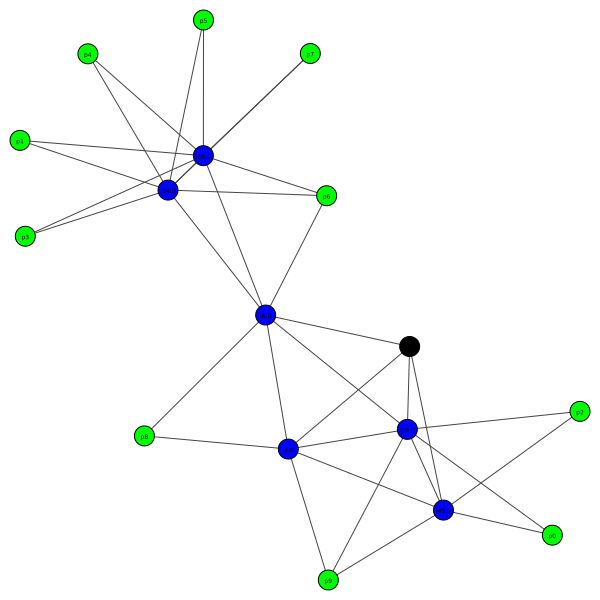

In [10]:
ROW = df.loc[123]
ROW['instance'].plot(labels=True, installation=ROW['gurobi_mf_installation'], minimal=True)